# Exercise 2

## Instructions 

1. Generate train and test data.
2. Define a class NN of one-hidden neural net. The __init__ function takes 3 parameters (inputsize, hiddensize, outputsize).

2. Define a list hidden_size = [2, ...., 33, ....128] with a step 5. Be sure that list contains 33, which corresponds to the case of interpolation threshold, i.e. the number of parameters equals to the number of training points.
3. 

for h in hidden_size:
    define model(inputsize, hiddensize, outputsize)
    for e in epochs:
        forward step: output = model(input)
        compute loss 
        backpropagate loss (use backward)
        
    get train loss (after training): train_out = model(input)
    train_loss = criterion(train_out, labels)
    get test_loss: test_out = model(input)
    test_loss = criterion(test_out, labels)
       
4. Plot saved list of train and test losses, x axis reveals each h, y axis is loss values.
     

In [33]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy.stats import multivariate_normal
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import csv
import torch
from torch.autograd import Variable
import torch.nn as nn
from sklearn import datasets
from sklearn.model_selection import train_test_split

np.random.seed(1234)

In [34]:
x_values = np.random.normal(size = 200)
x_vals = np.array(x_values, dtype=np.float32)
r = np.random.normal(0, 3, size = 200)

y_values = [3*i + 5 for i in x_values] + r
y_vals = np.array(y_values, dtype=np.float32)


In [35]:
x_train, x_test, y_train, y_test = (train_test_split(x_vals, y_vals, test_size=0.2))

In [36]:
x_train = (x_train).reshape(-1, 1)
x_test = (x_test).reshape(-1, 1)
y_train = (y_train).reshape(-1, 1)
y_test = (y_test).reshape(-1, 1)

In [37]:
x_vals.shape

(200,)

In [38]:
print(x_train.shape)
print(y_train.shape)

(160, 1)
(160, 1)


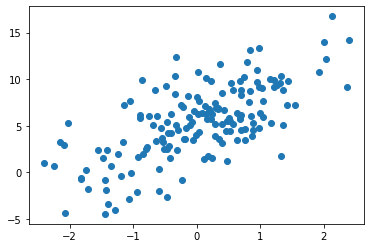

In [39]:
plt.scatter(x_train, y_train)

In [40]:
class NN(torch.nn.Module):
    def __init__(self, inputSize, hiddenSize, outputSize):
        super(NN, self).__init__()
        self.linear = nn.Sequential(torch.nn.Linear(inputSize, hiddenSize),
                                    torch.nn.ReLU(),
                                    torch.nn.Linear(hiddenSize, outputSize))
                                    

    def forward(self, x):
        out = self.linear(x)
        return out

In [41]:
inputDim = 1
hidden_sizes = 100
outputDim = 1      
learningRate = 0.01 
epochs = 101



In [42]:
criterion = torch.nn.MSELoss() 

In [43]:
#!!! Note that training in the code below done outside of epoch loop.
hs = []
train_losses = []
test_losses = []
for h in range(2, hidden_sizes, 1):
    hs.append(h)
    model = NN(inputDim, h, outputDim)
    optimizer = torch.optim.SGD(model.parameters(), lr=learningRate, momentum=0.95)
    for epoch in range(epochs):
        if torch.cuda.is_available():
            inputs_train = Variable(torch.from_numpy(x_train).cuda())
            labels_train = Variable(torch.from_numpy(y_train).cuda())
        else:
            inputs_train = Variable(torch.from_numpy(x_train))
            labels_train = Variable(torch.from_numpy(y_train))
        if torch.cuda.is_available():
            inputs_test = Variable(torch.from_numpy(x_test).cuda())
            labels_test = Variable(torch.from_numpy(y_test).cuda())
        else:
            inputs_test = Variable(torch.from_numpy(x_test))
            labels_test = Variable(torch.from_numpy(y_test))
        optimizer.zero_grad()
        outputs = model(inputs_train)
        loss = criterion(outputs, labels_train)
        loss.backward()
        optimizer.step()
        if epoch % 50 == 0:
            print('h: {} | epoch: {}, loss: {}'.format(h, epoch, loss.item()))  
    outputs_train = model(inputs_train)
    train_loss = criterion(outputs_train, labels_train)
    train_losses.append(train_loss)
    outputs_test = model(inputs_test)
    test_loss = criterion(outputs_test, labels_test)
    test_losses.append(test_loss)

h: 2 | epoch: 0, loss: 46.03596878051758
h: 2 | epoch: 50, loss: 17.14581298828125
h: 2 | epoch: 100, loss: 15.674542427062988
h: 3 | epoch: 0, loss: 48.082881927490234
h: 3 | epoch: 50, loss: 13.329673767089844
h: 3 | epoch: 100, loss: 8.924997329711914
h: 4 | epoch: 0, loss: 41.93513107299805
h: 4 | epoch: 50, loss: 9.918656349182129
h: 4 | epoch: 100, loss: 8.774276733398438
h: 5 | epoch: 0, loss: 40.9210090637207
h: 5 | epoch: 50, loss: 10.428961753845215
h: 5 | epoch: 100, loss: 8.585746765136719
h: 6 | epoch: 0, loss: 40.16803741455078
h: 6 | epoch: 50, loss: 9.052778244018555
h: 6 | epoch: 100, loss: 8.546297073364258
h: 7 | epoch: 0, loss: 45.48345947265625
h: 7 | epoch: 50, loss: 9.325770378112793
h: 7 | epoch: 100, loss: 8.411781311035156
h: 8 | epoch: 0, loss: 41.996498107910156
h: 8 | epoch: 50, loss: 9.229877471923828
h: 8 | epoch: 100, loss: 8.181831359863281
h: 9 | epoch: 0, loss: 41.877113342285156
h: 9 | epoch: 50, loss: 9.268392562866211
h: 9 | epoch: 100, loss: 8.417

h: 67 | epoch: 0, loss: 42.85679244995117
h: 67 | epoch: 50, loss: 9.052114486694336
h: 67 | epoch: 100, loss: 8.299660682678223
h: 68 | epoch: 0, loss: 51.462867736816406
h: 68 | epoch: 50, loss: 8.703376770019531
h: 68 | epoch: 100, loss: 8.257227897644043
h: 69 | epoch: 0, loss: 47.232078552246094
h: 69 | epoch: 50, loss: 8.729429244995117
h: 69 | epoch: 100, loss: 8.294543266296387
h: 70 | epoch: 0, loss: 43.64719772338867
h: 70 | epoch: 50, loss: 8.495532989501953
h: 70 | epoch: 100, loss: 8.275362014770508
h: 71 | epoch: 0, loss: 42.742671966552734
h: 71 | epoch: 50, loss: 9.112072944641113
h: 71 | epoch: 100, loss: 8.31584358215332
h: 72 | epoch: 0, loss: 45.412105560302734
h: 72 | epoch: 50, loss: 8.638666152954102
h: 72 | epoch: 100, loss: 8.329191207885742
h: 73 | epoch: 0, loss: 44.5247688293457
h: 73 | epoch: 50, loss: 9.808392524719238
h: 73 | epoch: 100, loss: 8.377039909362793
h: 74 | epoch: 0, loss: 47.24657440185547
h: 74 | epoch: 50, loss: 8.871252059936523
h: 74 | ep

In [44]:
with torch.no_grad(): 
    if torch.cuda.is_available():
        predicted = model(Variable(torch.from_numpy(x_train).cuda())).cpu().data.numpy()
    else:
        predicted = model(Variable(torch.from_numpy(x_train))).data.numpy()
    print(predicted)

[[ 8.441964  ]
 [ 2.9946406 ]
 [ 4.2080507 ]
 [ 5.98738   ]
 [ 7.6251025 ]
 [ 0.19140315]
 [ 8.582272  ]
 [ 5.3693476 ]
 [ 6.241005  ]
 [ 6.4541974 ]
 [ 3.4234335 ]
 [ 3.1693583 ]
 [ 7.220561  ]
 [ 4.052005  ]
 [ 5.127862  ]
 [ 2.9134061 ]
 [ 7.627179  ]
 [ 9.025843  ]
 [ 6.6271896 ]
 [ 4.1907673 ]
 [ 0.62052345]
 [ 0.0967567 ]
 [ 5.835269  ]
 [ 3.5238025 ]
 [ 0.36055565]
 [ 4.21277   ]
 [ 5.0831265 ]
 [ 7.800187  ]
 [ 5.526209  ]
 [ 6.652381  ]
 [ 0.4748323 ]
 [ 6.1499147 ]
 [ 5.831605  ]
 [ 8.30644   ]
 [ 2.5282187 ]
 [ 2.6846268 ]
 [-0.08406568]
 [ 8.171083  ]
 [ 7.092597  ]
 [ 6.404343  ]
 [ 6.8208895 ]
 [ 6.441437  ]
 [ 5.971283  ]
 [ 6.341963  ]
 [ 6.7488894 ]
 [ 7.283132  ]
 [-0.19602275]
 [ 6.9579287 ]
 [ 7.7657895 ]
 [ 4.2760024 ]
 [ 5.9888477 ]
 [ 2.72352   ]
 [-0.13157463]
 [ 6.25694   ]
 [11.757656  ]
 [ 2.5717654 ]
 [ 6.194023  ]
 [ 5.004831  ]
 [ 8.741248  ]
 [ 6.825588  ]
 [ 0.09544659]
 [ 5.767874  ]
 [ 7.218671  ]
 [ 4.7057824 ]
 [ 6.2393026 ]
 [ 5.2656446 ]
 [ 5.67152

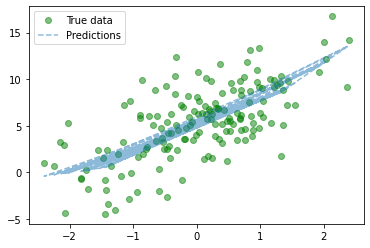

In [45]:
plt.clf()
plt.plot(x_train, y_train, 'go', label='True data', alpha=0.5)
plt.plot(x_train, predicted, '--', label='Predictions', alpha=0.5)
plt.legend(loc='best')
plt.show()

### Interpolation threshold.
Plot the interpolation threshold (n=p) as a vertical line.
The number of parameters is $p = (d+1)*H + (H+1)*K$, where H is a number of neurons in a hidden layer;
d is a dimension of input and K is a dimension of output (K=1 in the case of regression).
The X-axis on the plot below reveals the size of H.
1. What will be the value of H for the case n=p?
2. Plot the interpolation threshold. Does it correspond to a test loss pick?

(0.0, 100.0)

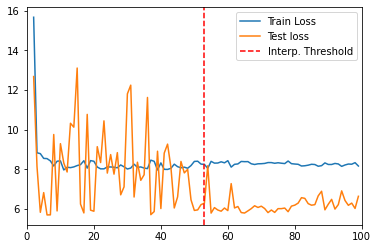

In [46]:
plt.plot(hs, train_losses, label='Train Loss')
plt.plot(hs, test_losses, label='Test loss')
plt.axvline(53, color = 'r', linestyle = '--', label = 'Interp. Threshold')
plt.legend(loc='best')
plt.xlim(0, 100)

(0.0, 100.0)

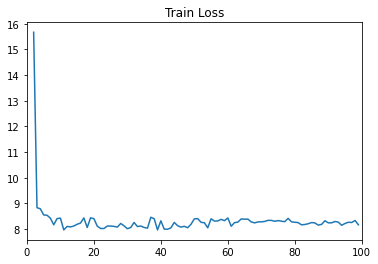

In [47]:
plt.plot(hs, train_losses)
plt.title('Train Loss')
plt.xlim(0, 100)

(0.0, 100.0)

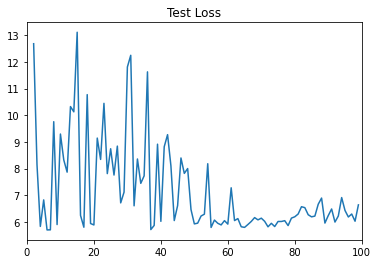

In [48]:
plt.plot(hs, test_losses)
plt.title('Test Loss')
plt.xlim(0, 100)